In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
# Veri setini yükleme
url =r"C:\Users\ceren\OneDrive\Masaüstü\model\pokemon.csv"

df = pd.read_csv(url)

In [3]:
df.head(15)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [4]:
df.isnull().sum() 

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [5]:
# Eksik Type 2 değerlerini 'None' ile dolduralım
df['Type 2'] = df['Type 2'].fillna('None')

In [6]:
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [7]:

le = LabelEncoder()
categorical_cols = ['Type 1', 'Type 2']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

print(df.head())



   #                   Name  Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur       9      14    318  45      49       49   
1  2                Ivysaur       9      14    405  60      62       63   
2  3               Venusaur       9      14    525  80      82       83   
3  3  VenusaurMega Venusaur       9      14    625  80     100      123   
4  4             Charmander       6      12    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  


In [8]:
def preprocess_data(df, column="Attack"):
    # 1) IQR ile aykırı değer temizleme
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]

    # 2) Özellikler ve hedef değişkeni ayırma
    X = df.drop("Legendary", axis=1)
    y = df["Legendary"]

    # 3) Veriyi eğitim ve test setine dönüştürme
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # 4) Eğitim ve test setlerini döndür
    return x_train, X_test, y_train, y_test


In [9]:
# Modelleri tanımlama
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(random_state=42))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ]),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}

In [10]:
# Özellikler ve hedef değişken
X = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Type 1', 'Type 2']]
y = df['Legendary']  # Efsanevi mi değil mi? (0 veya 1)

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      
    random_state=42,    
    stratify=y          
)



Random Forest modeli eğitiliyor...

Random Forest Sonuçları:
Doğruluk: 0.9313

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96       147
        True       0.75      0.23      0.35        13

    accuracy                           0.93       160
   macro avg       0.84      0.61      0.66       160
weighted avg       0.92      0.93      0.91       160



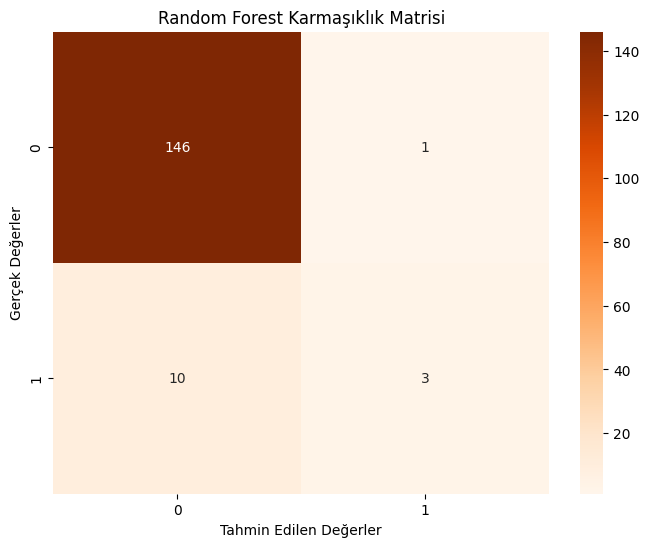


SVM modeli eğitiliyor...

SVM Sonuçları:
Doğruluk: 0.9313

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96       147
        True       0.67      0.31      0.42        13

    accuracy                           0.93       160
   macro avg       0.80      0.65      0.69       160
weighted avg       0.92      0.93      0.92       160



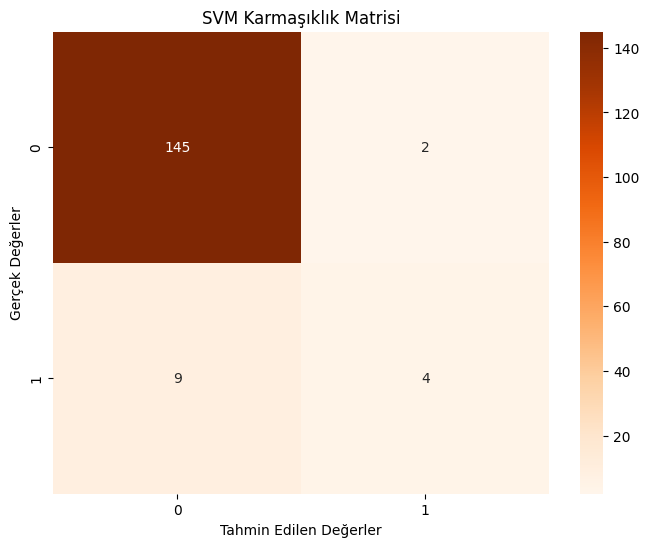


KNN modeli eğitiliyor...

KNN Sonuçları:
Doğruluk: 0.9437

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       147
        True       0.75      0.46      0.57        13

    accuracy                           0.94       160
   macro avg       0.85      0.72      0.77       160
weighted avg       0.94      0.94      0.94       160



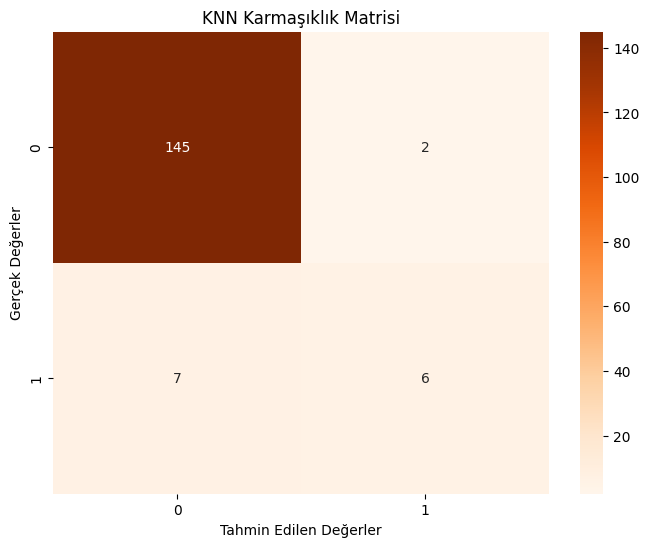


XGBoost modeli eğitiliyor...

XGBoost Sonuçları:
Doğruluk: 0.9187

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       False       0.94      0.97      0.96       147
        True       0.50      0.31      0.38        13

    accuracy                           0.92       160
   macro avg       0.72      0.64      0.67       160
weighted avg       0.90      0.92      0.91       160



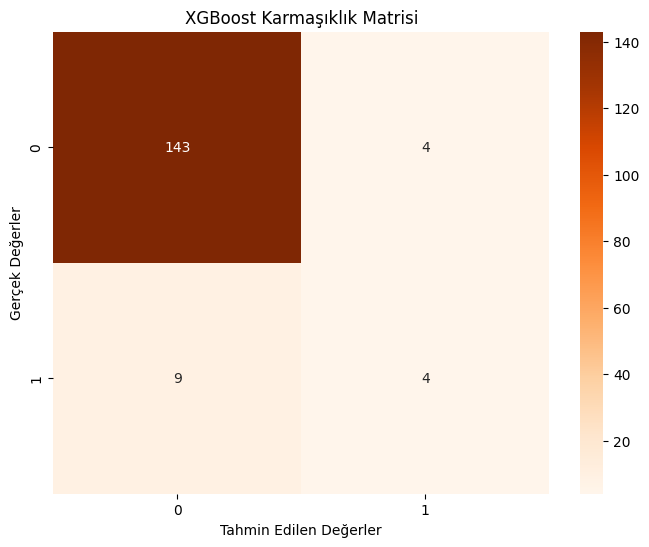


LightGBM modeli eğitiliyor...

LightGBM Sonuçları:
Doğruluk: 0.9313

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       147
        True       0.60      0.46      0.52        13

    accuracy                           0.93       160
   macro avg       0.78      0.72      0.74       160
weighted avg       0.92      0.93      0.93       160



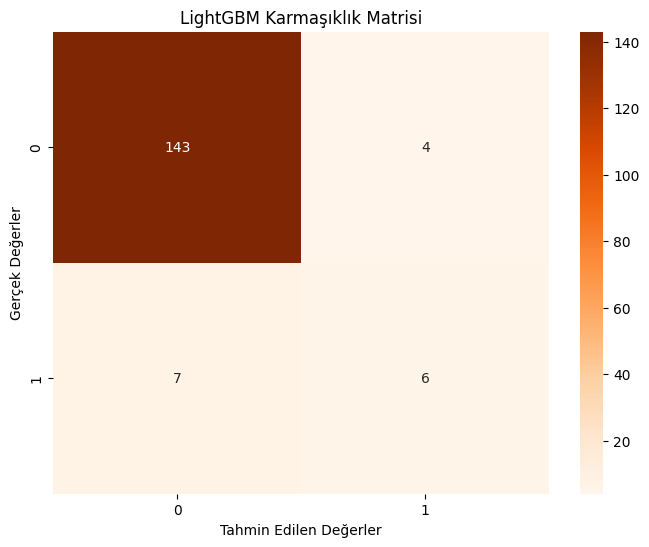


CatBoost modeli eğitiliyor...

CatBoost Sonuçları:
Doğruluk: 0.9313

Sınıflandırma Raporu:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96       147
        True       0.67      0.31      0.42        13

    accuracy                           0.93       160
   macro avg       0.80      0.65      0.69       160
weighted avg       0.92      0.93      0.92       160



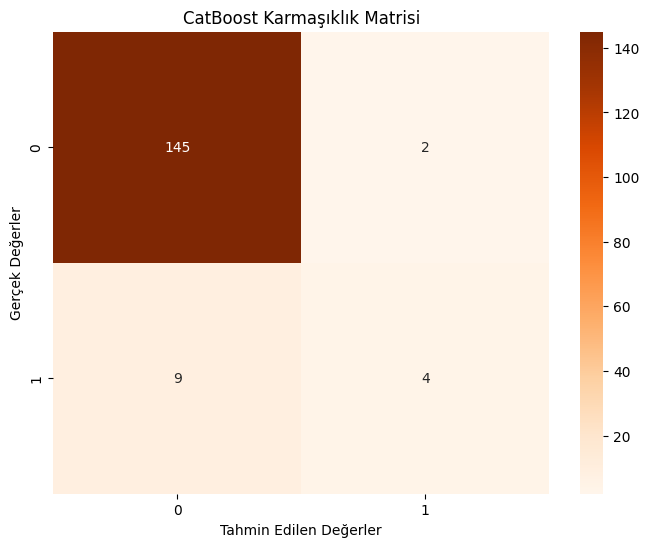

In [11]:
# Modelleri eğitme ve değerlendirme
results = {}
for name, model in models.items():
    print(f"\n{name} modeli eğitiliyor...")
    # Model eğitimi
    model.fit(X_train, y_train)

    # Tahminler
    y_pred = model.predict(X_test)

    # Sonuçları kaydetme
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    print(f"\n{name} Sonuçları:")
    print(f"Doğruluk: {results[name]['accuracy']:.4f}")
    print("\nSınıflandırma Raporu:")
    print(results[name]['classification_report'])

    # Karmaşıklık matrisini görselleştirme
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Oranges')
    plt.title(f'{name} Karmaşıklık Matrisi')
    plt.ylabel('Gerçek Değerler')
    plt.xlabel('Tahmin Edilen Değerler')
    plt.show()


In [12]:
y.value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

In [13]:
# En iyi modeli bulma
best_model_name = max(results.items(), key=lambda x: x[1]['accuracy'])[0]
print(f"\nEn iyi model: {best_model_name} (Doğruluk: {results[best_model_name]['accuracy']:.4f})")

# En iyi model için hiper parametre optimizasyonu
print(f"\n{best_model_name} için hiper parametre optimizasyonu yapılıyor...")



En iyi model: KNN (Doğruluk: 0.9437)

KNN için hiper parametre optimizasyonu yapılıyor...


In [14]:
# Hiper parametre grid'lerini tanımlama
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'svm__C': [0.1, 1, 10],
        'svm__kernel': ['rbf', 'linear'],
        'svm__gamma': ['scale', 'auto', 0.1, 1]
    },
    'KNN': {
        'knn__n_neighbors': [3, 5, 7, 9],
        'knn__weights': ['uniform', 'distance'],
        'knn__metric': ['euclidean', 'manhattan']
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [31, 50, 100]
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'l2_leaf_reg': [1, 3, 5]
    }
}

In [15]:
#GridSearchCV ile en iyi modelleri bulma ve değerlendirme
results = {}
for name, model in models.items():
    print(f"\n{name} için GridSearch başlıyor...")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)

    results[name] = {
        'best_params': grid.best_params_,
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

    print(f"En iyi parametreler: {grid.best_params_}")
    print(f"Test Doğruluğu: {results[name]['accuracy']:.4f}")
    print("Sınıflandırma Raporu:")
    print(results[name]['classification_report'])


Random Forest için GridSearch başlıyor...
En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Doğruluğu: 0.9313
Sınıflandırma Raporu:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96       147
        True       0.75      0.23      0.35        13

    accuracy                           0.93       160
   macro avg       0.84      0.61      0.66       160
weighted avg       0.92      0.93      0.91       160


SVM için GridSearch başlıyor...
En iyi parametreler: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Test Doğruluğu: 0.9187
Sınıflandırma Raporu:
              precision    recall  f1-score   support

       False       0.95      0.97      0.96       147
        True       0.50      0.38      0.43        13

    accuracy                           0.92       160
   macro avg       0.72      0.68      0.70       160
weighted avg       0.91      0.92      0.91  

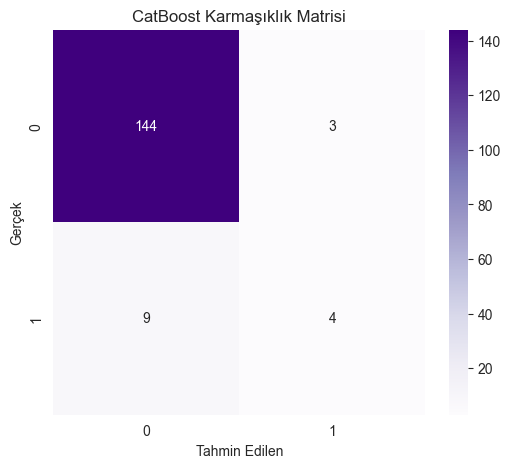

In [18]:
    # Karmaşıklık Matrisi Görselleştirme
    plt.figure(figsize=(6, 5))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Purples')
    plt.title(f'{name} Karmaşıklık Matrisi')
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.show()

C:\Users\ceren\AppData\Local\Temp\ipykernel_6976\1336297864.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


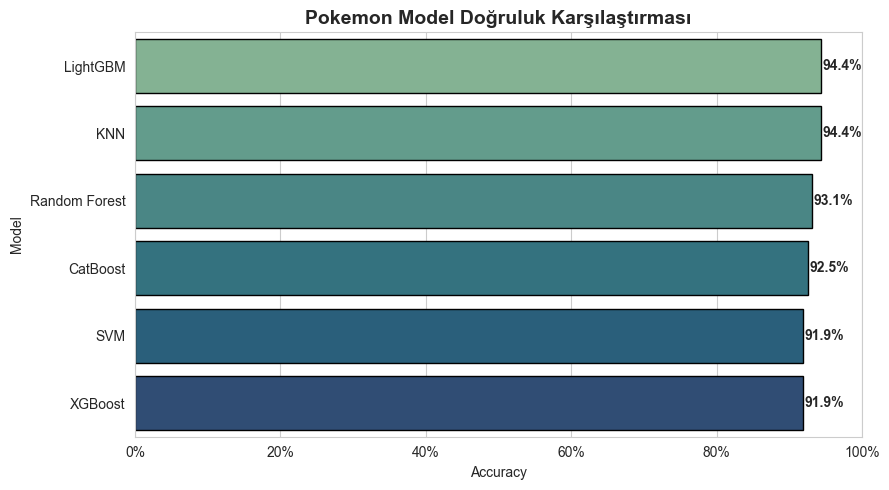

In [20]:
#Tüm modellerin doğruluklarını karşılaştırma
import matplotlib.ticker as mticker

# Doğruluk verilerini dataframe'e dönüştür
accuracy_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results]
}).sort_values('Accuracy', ascending=False).reset_index(drop=True)

# Görsel boyut ve stil
plt.figure(figsize=(9, 5))
sns.set_style("whitegrid")
palette = sns.color_palette("crest", len(accuracy_df))

# Barplot
ax = sns.barplot(
    data=accuracy_df,
    x='Accuracy', y='Model',
    palette=palette,
    edgecolor='black'
)

# Her barın üzerine yüzde olarak skor yaz
for idx, row in accuracy_df.iterrows():
    ax.text(
        row['Accuracy'] + 0.002, idx,
        f"{row['Accuracy']*100:.1f}%",
        va='center', ha='left', fontsize=10, fontweight='bold'
    )

# X eksenini % formatına çevir
ax.xaxis.set_major_formatter(mticker.PercentFormatter(1.0))

# Başlık ve limitler
plt.xlim(0, 1)
plt.title('Pokemon Model Doğruluk Karşılaştırması', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()